# Prep Bringing in Data and Libraries

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

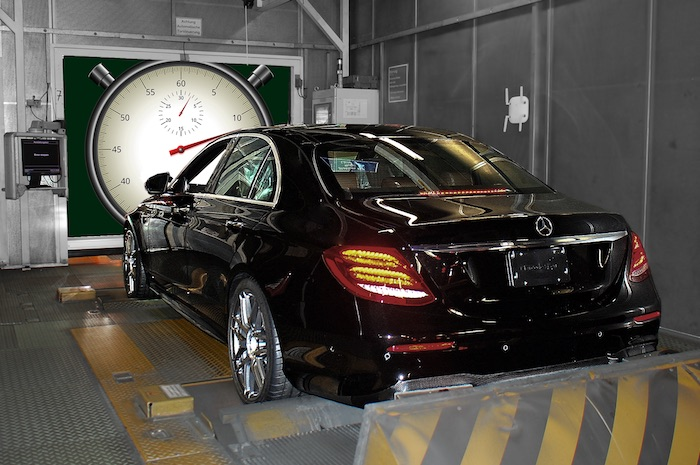

Competition Was Closed, but RDF Resulted in a Top 20 Finish Out of 3,845 Teams Was Done 3 Months After Close

#### Essential Loadings 

In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib inline

In [2]:
from fastai import *
from fastai.structured import *
from fastai.column_data import *
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from scipy.cluster import hierarchy as hc

from sklearn import metrics
from sklearn.metrics import r2_score

from pdpbox import pdp
from plotnine import *

from fastai.learner import *

#### Data Loading & Dependent Variable Cleaning

In [3]:
PATH = "tmp/benz/"

In [4]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)
df_test = pd.read_csv(f'{PATH}test.csv', low_memory = False)

In [5]:
df_raw['z'] = 1
df_test['z'] = 1

In [6]:
df_raw.shape

(4209, 379)

In [7]:
df_test.shape

(4209, 378)

In [8]:
df_raw.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384', 'X385',
       'z'],
      dtype='object', length=379)

In [9]:
list(df_raw)

['ID',
 'y',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 '

In [10]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)

#### Metric Scoring

In [11]:
def r2(x,y): return r2_score(y, x)

#Creating RMSE 
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

#### Pre-Processing 

In [12]:
cat_vars =[ 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137','X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X150', 'X151', 'X152', 'X153', 'X154', 'X155', 'X156', 'X157','X158', 'X159', 'X160', 'X161', 'X162', 'X163', 'X164', 'X165', 'X166', 'X167', 'X168', 'X169', 'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178', 'X179', 'X180', 'X181', 'X182', 'X183', 'X184', 'X185', 'X186', 'X187', 'X189', 'X190', 'X191', 'X192', 'X194', 'X195', 'X196', 'X197', 'X198', 'X199', 'X200', 'X201', 'X202', 'X203', 'X204', 'X205', 'X206', 'X207', 'X208', 'X209', 'X210', 'X211', 'X212', 'X213', 'X214', 'X215', 'X216', 'X217', 'X218', 'X219', 'X220', 'X221', 'X222', 'X223', 'X224', 'X225', 'X226', 'X227', 'X228', 'X229', 'X230', 'X231', 'X232', 'X233', 'X234', 'X235', 'X236', 'X237', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243', 'X244', 'X245', 'X246', 'X247', 'X248', 'X249', 'X250', 'X251', 'X252', 'X253', 'X254', 'X255', 'X256', 'X257', 'X258', 'X259', 'X260', 'X261', 'X262', 'X263', 'X264', 'X265', 'X266', 'X267', 'X268', 'X269', 'X270', 'X271', 'X272', 'X273', 'X274', 'X275', 'X276', 'X277', 'X278', 'X279', 'X280', 'X281', 'X282', 'X283', 'X284', 'X285', 'X286', 'X287', 'X288', 'X289', 'X290', 'X291', 'X292', 'X293', 'X294', 'X295', 'X296', 'X297', 'X298', 'X299', 'X300', 'X301', 'X302', 'X304', 'X305', 'X306', 'X307', 'X308', 'X309', 'X310', 'X311', 'X312', 'X313', 'X314', 'X315', 'X316', 'X317', 'X318', 'X319', 'X320','X321', 'X322', 'X323', 'X324', 'X325', 'X326', 'X327', 'X328', 'X329', 'X330', 'X331', 'X332', 'X333', 'X334', 'X335', 'X336', 'X337', 'X338', 'X339', 'X340', 'X341', 'X342', 'X343','X344', 'X345', 'X346', 'X347', 'X348', 'X349', 'X350', 'X351', 'X352', 'X353', 'X354', 'X355', 'X356', 'X357', 'X358', 'X359', 'X360', 'X361', 'X362', 'X363', 'X364', 'X365',
 'X366', 'X367', 'X368', 'X369', 'X370', 'X371', 'X372', 'X373', 'X374', 'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384','X385']

In [13]:
contin_vars = ['z']

In [14]:
n = len(df_raw); n

4209

In [15]:
dep = 'y'
df_raw = df_raw[cat_vars+contin_vars+[dep, 'ID']].copy()

In [16]:
df_test[dep] = 0
df_test = df_test[cat_vars+contin_vars+[dep, 'ID']].copy()

In [17]:
for v in cat_vars: df_raw[v] = df_raw[v].astype('category')
for v in cat_vars: df_test[v] = df_test[v].astype('category')

In [18]:
apply_cats(df_test, df_raw)

In [64]:
#for v in contin_vars: 
#    df_raw[v] = df_raw[v].astype('float32')
#    df_test[v] = df_raw[v].astype('float32')

In [20]:
idxs = get_cv_idxs(n, val_pct = .10)
df_samp = df_raw.iloc[idxs].set_index("ID")
samp_size = len(df_samp); samp_size

420

In [21]:
samp_size = n 
df_samp = df_raw.set_index("ID")

In [22]:
#Double check we have what we want 
df_samp.head(2)


,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X377,X378,X379,X380,X382,X383,X384,X385,z,y
ID,,,,,,,,,,,,,,,,,,,,,
0,k,v,at,a,d,u,j,o,0,0,...,1,0,0,0,0,0,0,0,1,130.81
6,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,1,88.53


In [23]:
df, y, nas, mapper = proc_df(df_samp, 'y', do_scale = True)
y1 = np.log(y)

In [24]:
df.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,z
ID,,,,,,,,,,,,,,,,,,,,,
0,33,24,18,1,4,25,10,15,1,1,...,1,2,1,1,1,1,1,1,1,0.0
6,33,22,20,5,4,29,12,15,1,1,...,1,1,1,1,1,1,1,1,1,0.0


In [25]:
#train_ratio = 0.8
train_ratio = 0.80
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [26]:
df_test['y'] = 0 

In [27]:
df_test = df_test.set_index('ID')

In [28]:
df_test1, _, nas, mapper = proc_df(df_test, 'y', do_scale=True, mapper=mapper, na_dict=nas)

# DL

In [106]:
#Creating RMSE 
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
#log_max_y = np.max(y)
#y_range =(0, log_max_y*1.2)

In [107]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y1, cat_flds = cat_vars, bs = 64, test_df= df_test1)

In [108]:
cat_sz = [(c, len(df_samp[c].cat.categories)+1) for c in cat_vars]

In [109]:
cat_sz

[('X0', 48),
 ('X1', 28),
 ('X2', 45),
 ('X3', 8),
 ('X4', 5),
 ('X5', 30),
 ('X6', 13),
 ('X8', 26),
 ('X10', 3),
 ('X11', 2),
 ('X12', 3),
 ('X13', 3),
 ('X14', 3),
 ('X15', 3),
 ('X16', 3),
 ('X17', 3),
 ('X18', 3),
 ('X19', 3),
 ('X20', 3),
 ('X21', 3),
 ('X22', 3),
 ('X23', 3),
 ('X24', 3),
 ('X26', 3),
 ('X27', 3),
 ('X28', 3),
 ('X29', 3),
 ('X30', 3),
 ('X31', 3),
 ('X32', 3),
 ('X33', 3),
 ('X34', 3),
 ('X35', 3),
 ('X36', 3),
 ('X37', 3),
 ('X38', 3),
 ('X39', 3),
 ('X40', 3),
 ('X41', 3),
 ('X42', 3),
 ('X43', 3),
 ('X44', 3),
 ('X45', 3),
 ('X46', 3),
 ('X47', 3),
 ('X48', 3),
 ('X49', 3),
 ('X50', 3),
 ('X51', 3),
 ('X52', 3),
 ('X53', 3),
 ('X54', 3),
 ('X55', 3),
 ('X56', 3),
 ('X57', 3),
 ('X58', 3),
 ('X59', 3),
 ('X60', 3),
 ('X61', 3),
 ('X62', 3),
 ('X63', 3),
 ('X64', 3),
 ('X65', 3),
 ('X66', 3),
 ('X67', 3),
 ('X68', 3),
 ('X69', 3),
 ('X70', 3),
 ('X71', 3),
 ('X73', 3),
 ('X74', 3),
 ('X75', 3),
 ('X76', 3),
 ('X77', 3),
 ('X78', 3),
 ('X79', 3),
 ('X80', 3),
 

In [110]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [111]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1, [500,250,100], [0.001, .001, .01]) #y_range= y_range)

lr = 1e-4

In [112]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1, [1000,500], [0.001,.01])
lr = 1e-3

In [113]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 70%|██████▉   | 37/53 [00:02<00:01, 14.08it/s, loss=97.7]


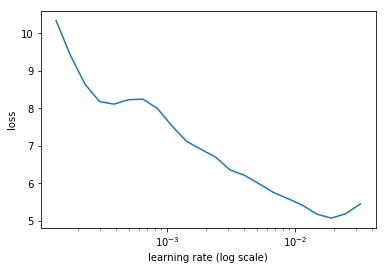

In [114]:
m.sched.plot()

#### Sample

In [77]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1, [500,250,100], [0.001, .001, .01], y_range= y_range)
lr = 1e-4

In [78]:
m.fit(lr, 1, metrics=[rmse])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   rmse                          
    0      30.684672  0.258868   0.500831  



[0.25886768, 0.5008311320402794]

In [79]:
m.fit(lr, 1, metrics=[rmse])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   rmse                        
    0      0.573918   0.17619    0.417     



[0.17618959, 0.4170004896904947]

#### All Data 

In [37]:
#m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1, [500,250,100], [0.001, .001, .01], y_range= y_range)
#lr = 1e-4

In [115]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1, [1000,500], [0.001,.01])
#m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1, [500,250,100], [0.001, .001, .01])
lr = 1e-3

In [116]:
m.fit(lr, 1, metrics=[r2])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   r2                        
    0      0.379269   0.013835   -0.053763 



[0.013835356, -0.053762665827655]

In [121]:
m.fit(lr, 3, metrics=[r2], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   r2                         
    0      0.04986    0.00616    0.534548  
    1      0.022846   0.004971   0.623932                   
    2      0.016513   0.005178   0.608585                   



[0.0051781135, 0.6085852057346212]

In [118]:
lr= 1e-3
m.fit(lr, 3, metrics=[r2], cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   r2                         
    0      0.054232   0.00756    0.422862  
    1      0.026795   0.005924   0.548613                   
    2      0.019598   0.00577    0.562383                   
    3      0.017663   0.00605    0.539453                   
    4      0.015881   0.005423   0.589019                   
    5      0.015027   0.004911   0.627839                   
    6      0.013653   0.005264   0.601992                   



[0.00526438, 0.6019917703792768]

In [120]:
m.fit(lr, 3, metrics=[r2])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   r2                         
    0      0.049157   0.01025    0.221947  
    1      0.023973   0.00995    0.244428                   
    2      0.018805   0.008077   0.388226                   



[0.008077027, 0.3882261287607197]

In [119]:
m.save('val1')

In [51]:
m.load('val1')

### Test/Submit

In [64]:
x,y=m.predict_with_targs()

In [65]:
r2(x,y)

0.6381139398286831

In [122]:
pred_test=m.predict(True)

In [123]:
pred_test[:12,]

array([[4.37492],
       [4.47831],
       [4.3371 ],
       [4.37156],
       [4.72544],
       [4.53703],
       [4.74862],
       [4.52497],
       [4.76525],
       [4.4944 ],
       [4.72213],
       [4.6312 ]], dtype=float32)

In [100]:
pred_test = np.exp(pred_test)

In [101]:
pred_test[:12,]

array([[ 77.17489],
       [ 90.29149],
       [ 77.93235],
       [ 79.90183],
       [107.74046],
       [ 91.61489],
       [112.986  ],
       [ 92.85948],
       [115.68767],
       [ 91.33212],
       [114.57936],
       [107.56536]], dtype=float32)

In [102]:
df_test['y']= pred_test

In [103]:
csv_fn=f'{PATH}tmp/sub.csv'

In [104]:
df_test[['y']].to_csv(csv_fn, index=True)

In [105]:
FileLink(csv_fn)

/home/paperspace/fastai/courses/dl1/tmp/benz/tmp/sub.csv